# **Análisis contaminantes registrados**

*Nota: hacer el trabajo con el nuevo conjunto de datos llamado "CSV_Datos_Ok.csv"*

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from fitter import Fitter, get_common_distributions, get_distributions

guardar_imagenes = False

In [3]:
datosContaminantes = pd.read_csv("CSV_Datos_OK.csv", parse_dates={"Fecha":["Año", "Mes", "Día"]})
datosContaminantes = datosContaminantes.drop(["Minuto", "Segundo"], axis=1)
datosContaminantes

,Fecha,Hora,valor_contaminante,calidad_contaminante,calidad,estacion,contaminante
0,2012-11-27,12,43.0000,1,1,12,pm25
1,2012-11-27,13,22.0000,1,1,12,pm25
2,2012-11-27,14,31.0000,1,1,12,pm25
3,2012-11-27,15,29.0000,1,1,12,pm25
4,2012-11-27,16,32.0000,1,1,12,pm25
...,...,...,...,...,...,...,...
1185035,2022-07-31,19,10.6495,1,1,86,pm25
1185036,2022-07-31,20,9.4167,1,1,86,pm25
1185037,2022-07-31,21,15.2623,1,1,86,pm25
1185038,2022-07-31,22,16.4119,1,1,86,pm25


In [4]:
# Funcion para convertir valores str en float
def ToFloat(df):
    if isinstance(df, str):
        if df.count('.') == 2:
            return float( df.replace('.', '', 1) )
        else:
            return float(df)
    else:
        return float(df)

# Funcion para extraer los dias de la semana
def DayOfWeek(df):
    return df.strftime('%A')

In [5]:
# Reemplazando valores en la columna a aplicar la funcion ToFloat
datosContaminantes["valor_contaminante"] = datosContaminantes["valor_contaminante"].apply(ToFloat)

# insertando los dias
datosContaminantes.insert(1, "Dia_Semana", np.array( datosContaminantes["Fecha"].apply(DayOfWeek) ) )

datosContaminantes

,Fecha,Dia_Semana,Hora,valor_contaminante,calidad_contaminante,calidad,estacion,contaminante
0,2012-11-27,Tuesday,12,43.0000,1,1,12,pm25
1,2012-11-27,Tuesday,13,22.0000,1,1,12,pm25
2,2012-11-27,Tuesday,14,31.0000,1,1,12,pm25
3,2012-11-27,Tuesday,15,29.0000,1,1,12,pm25
4,2012-11-27,Tuesday,16,32.0000,1,1,12,pm25
...,...,...,...,...,...,...,...,...
1185035,2022-07-31,Sunday,19,10.6495,1,1,86,pm25
1185036,2022-07-31,Sunday,20,9.4167,1,1,86,pm25
1185037,2022-07-31,Sunday,21,15.2623,1,1,86,pm25
1185038,2022-07-31,Sunday,22,16.4119,1,1,86,pm25


Arreglamos los datos que presenten inconsistencias, ordenamos de menor a mayor por fechas y borramos columna de índice duplicada tras la última operación:

In [6]:
datosContaminantes = datosContaminantes[(datosContaminantes["valor_contaminante"] >= 0.0) & \
                                        (datosContaminantes["valor_contaminante"] != 999.0) & \
                                        (datosContaminantes["calidad_contaminante"] != 151)]
datosContaminantes

,Fecha,Dia_Semana,Hora,valor_contaminante,calidad_contaminante,calidad,estacion,contaminante
0,2012-11-27,Tuesday,12,43.0000,1,1,12,pm25
1,2012-11-27,Tuesday,13,22.0000,1,1,12,pm25
2,2012-11-27,Tuesday,14,31.0000,1,1,12,pm25
3,2012-11-27,Tuesday,15,29.0000,1,1,12,pm25
4,2012-11-27,Tuesday,16,32.0000,1,1,12,pm25
...,...,...,...,...,...,...,...,...
1185035,2022-07-31,Sunday,19,10.6495,1,1,86,pm25
1185036,2022-07-31,Sunday,20,9.4167,1,1,86,pm25
1185037,2022-07-31,Sunday,21,15.2623,1,1,86,pm25
1185038,2022-07-31,Sunday,22,16.4119,1,1,86,pm25


In [7]:
datosContaminantes = datosContaminantes.sort_values(by=["Fecha", "Hora"]).reset_index().drop("index", axis=1)
datosContaminantes

,Fecha,Dia_Semana,Hora,valor_contaminante,calidad_contaminante,calidad,estacion,contaminante
0,2012-09-18,Tuesday,12,16.0000,1,1,25,pm25
1,2012-09-18,Tuesday,13,18.0000,1,1,25,pm25
2,2012-09-18,Tuesday,14,18.0000,1,1,25,pm25
3,2012-09-18,Tuesday,15,17.0000,1,1,25,pm25
4,2012-09-18,Tuesday,16,17.0000,1,1,25,pm25
...,...,...,...,...,...,...,...,...
1185035,2022-08-31,Wednesday,19,113.3006,1,1,6,nox
1185036,2022-08-31,Wednesday,20,46.5652,1,1,6,nox
1185037,2022-08-31,Wednesday,21,51.3882,1,1,6,nox
1185038,2022-08-31,Wednesday,22,88.6126,1,1,6,nox


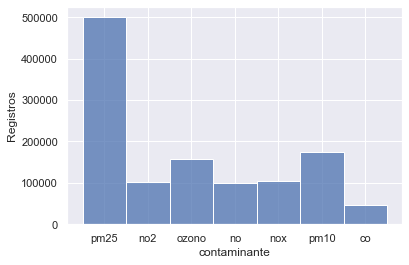

In [8]:
sns.set_theme(style='dark')
sns.color_palette("dark:salmon_r", as_cmap=True)

sns.histplot(data=datosContaminantes, x="contaminante")

plt.ylabel('Registros')
sns.set(rc={'figure.figsize':(9, 8)})

#plt.savefig('registros_contaminantes.png', bbox_inches='tight', dpi=200)
plt.grid(); plt.show()

# **Muestra aleatoria de tamaño definido**

Se ha elegido un tamaño de muestra representativo de $n$ datos

In [68]:
# muestra aleatoria de tamaño n
muestraContaminantes = datosContaminantes.sample(n=2000)
muestraContaminantes

,Fecha,Dia_Semana,Hora,valor_contaminante,calidad_contaminante,calidad,estacion,contaminante
419502,2017-12-16,Saturday,14,25.0000,1,1,12,pm25
201646,2016-06-05,Sunday,18,45.0000,1,1,12,pm10
875245,2020-05-26,Tuesday,16,8.7740,1,1,83,pm25
876373,2020-05-29,Friday,8,30.0000,1,1,12,pm25
264556,2016-12-16,Friday,4,33.0000,1,1,12,pm25
...,...,...,...,...,...,...,...,...
1133540,2022-02-19,Saturday,16,20.0000,1,1,44,pm25
544016,2018-08-08,Wednesday,17,12.2381,1,1,6,no
1176239,2022-06-26,Sunday,19,14.2135,1,1,80,pm25
818524,2020-01-21,Tuesday,5,18.0000,1,1,12,pm25


Ordenando los valores:

In [69]:
# ordenar los valores de la muestra
muestraContaminantes = muestraContaminantes.sort_values(by=["Fecha", "Hora"]).reset_index().drop("index", axis=1)
muestraContaminantes

,Fecha,Dia_Semana,Hora,valor_contaminante,calidad_contaminante,calidad,estacion,contaminante
0,2012-10-27,Saturday,3,17.0000,1,1,25,pm25
1,2013-01-03,Thursday,4,25.0000,1,1,12,pm25
2,2013-01-05,Saturday,13,18.0000,1,1,25,pm25
3,2013-01-21,Monday,8,59.0000,1,1,25,pm25
4,2013-02-07,Thursday,15,35.0000,1,1,12,pm25
...,...,...,...,...,...,...,...,...
1995,2022-07-25,Monday,23,2.4117,1,1,85,pm25
1996,2022-07-27,Wednesday,0,21.0000,1,1,48,pm25
1997,2022-07-28,Thursday,0,9.2328,1,1,86,pm25
1998,2022-08-07,Sunday,7,88.1100,1,1,6,nox


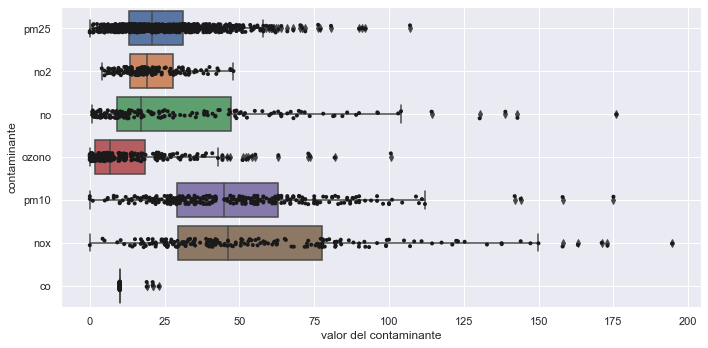

In [70]:
sns.set_theme(style='dark')

sns.boxplot(data=muestraContaminantes, x='valor_contaminante', y='contaminante')

sns.stripplot(data=muestraContaminantes, x='valor_contaminante', y='contaminante',
              size=4, color='k', linewidth=0)

sns.set(rc={'figure.figsize':(9, 7)})
plt.xlabel("valor del contaminante"); plt.grid()
plt.tight_layout()

# para guardar el plot
if guardar_imagenes:
    plt.savefig('boxplots_contaminantes.png', bbox_inches='tight', dpi=200)

plt.show()

In [71]:
muestraContaminantes["valor_contaminante"].describe()

count    2000.000000
mean       28.931278
std        25.524561
min         0.000000
25%        11.000000
50%        22.000000
75%        38.000000
max       194.620300
Name: valor_contaminante, dtype: float64

## **Contaminante pm2.5 para la muestra aleatoria**

Veamos la distribución del contaminante pm2.5 para la muestra aleatoria extraída de tamaño $n=1000$ representando los datos mediante un diagrama de cajas y bigotes

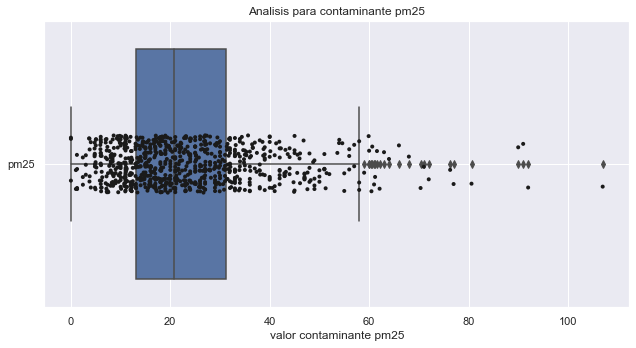

In [73]:
sns.set_theme(style='dark')

sns.boxplot(
    data = muestraContaminantes[ muestraContaminantes['contaminante'] == 'pm25' ],
    x = 'valor_contaminante',
    y = 'contaminante'
)

sns.stripplot(
    data = muestraContaminantes[ muestraContaminantes['contaminante'] == 'pm25' ],
    x='valor_contaminante',
    y='contaminante',
    size=4, color='k', linewidth=0
)

sns.set(rc={'figure.figsize':(9, 5)})

plt.title("Analisis para contaminante pm25")
plt.ylabel(''); plt.xlabel('valor contaminante pm25'); plt.grid()
plt.tight_layout()

# para guardar el plot
if guardar_imagenes:
    plt.savefig("boxplot_pm25.png", bbox_inches='tight', dpi=150)

plt.show()

## **Distribución y ajuste del contaminante PM2.5**

Con el fin de determinar qué distribución puede seguir los valores del contaminante PM2.5 registrados se han hecho los cálculos necesarios para encontrar aquella distribución de probabilidad que mejor se ajuste a los valores:

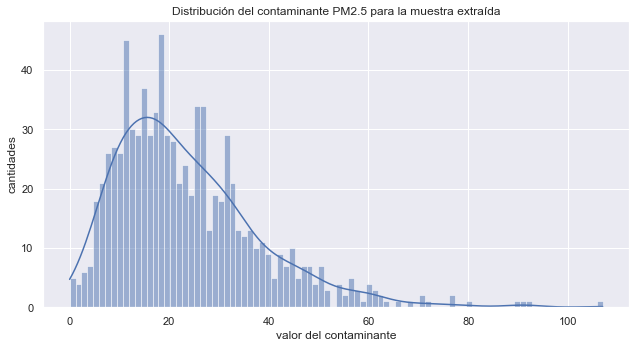

In [74]:
sns.set_theme(style='dark')

sns.histplot(
    muestraContaminantes[ muestraContaminantes["contaminante"] == "pm25" ],
    x='valor_contaminante',
    bins=90,
    kde=True
)

sns.set(rc={'figure.figsize':(9, 5)})
plt.title("Distribución del contaminante PM2.5 para la muestra extraída")
plt.xlabel("valor del contaminante"); plt.ylabel("cantidades"); plt.grid()
plt.tight_layout()

# para guardar el plot
if guardar_imagenes:
    plt.savefig("distr_pm25.png", bbox_inches='tight', dpi=130)

plt.show()

,sumsquare_error,aic,bic,kl_div
chi2,0.001440,1240.281467,-11232.169226,inf
gamma,0.001440,1240.279267,-11232.167361,inf
beta,0.001739,1360.966143,-11065.432853,inf
t,0.002665,1320.837539,-10710.723471,inf
norm,0.003248,1586.924749,-10549.706292,inf


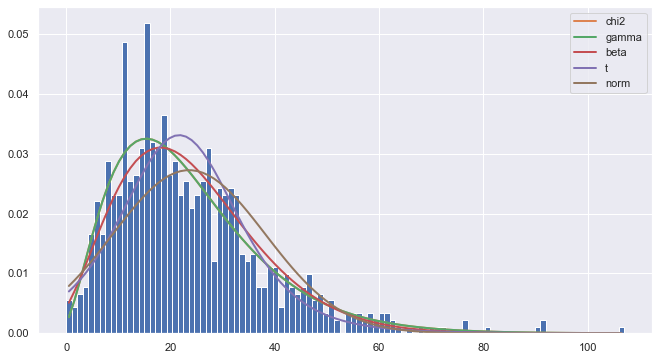

In [75]:
sns.set_theme(style='dark')

# ajuste a distribucion
f = Fitter(
    muestraContaminantes[muestraContaminantes["contaminante"] == "pm25"]["valor_contaminante"],
    distributions=['gamma',
                   'lognorm',
                   't',
                   'f',
                   "beta",
                   "chi2",
                   "norm"]
)

sns.set(rc={'figure.figsize':(11,6)}); plt.grid()
f.fit(); f.summary()

## **Comportamiento en el tiempo de los contaminantes**

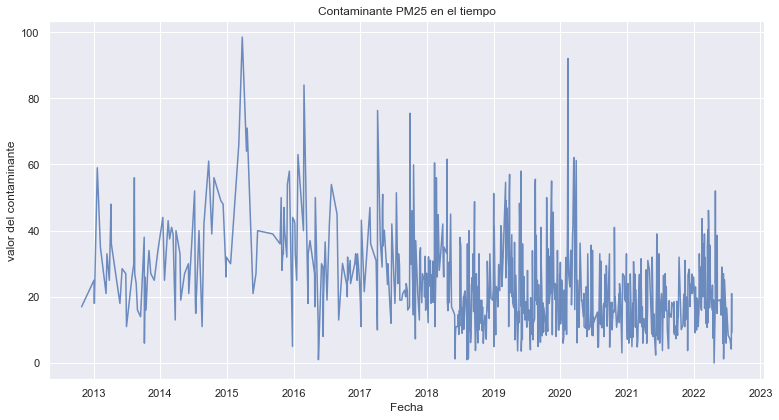

In [76]:
sns.lineplot(
    data = muestraContaminantes[muestraContaminantes["contaminante"] == "pm25"],
    x = "Fecha",
    y = "valor_contaminante",
    ci = False,
    alpha = 0.8
)

sns.set(rc={'figure.figsize':(9, 5)})

plt.title("Contaminante PM25 en el tiempo"); plt.ylabel("valor del contaminante")
plt.tight_layout()

# para guardar el plot
if guardar_imagenes:
    plt.savefig("muestraPM25_tiempo.png", bbox_inches='tight', dpi=200)

plt.show()

## **Tendencia**

Para visualizar con mejor detalle lo que sucede en términos de la tendencia del contaminante, veamos con una linea de tendencia los datos en su forma de dispersión

In [77]:
def toTimestamp(df):
    return datetime.timestamp(df)

Para calcular la linea de tendencia, es necesario que los datos en el eje x sean de tipo `timestamp`, de esta forma los calculos serán permitidos y podremos determinar el orden de ajuste.

In [78]:
# para calcular la linea de tendencia se requieren datos tipo
# 'timestamp' en el eje x
muestraFechaTimestamp = muestraContaminantes.copy()
muestraFechaTimestamp["Fecha"] = muestraFechaTimestamp["Fecha"].apply(toTimestamp)

muestraFechaTimestamp

,Fecha,Dia_Semana,Hora,valor_contaminante,calidad_contaminante,calidad,estacion,contaminante
0,1.351314e+09,Saturday,3,17.0000,1,1,25,pm25
1,1.357189e+09,Thursday,4,25.0000,1,1,12,pm25
2,1.357362e+09,Saturday,13,18.0000,1,1,25,pm25
3,1.358744e+09,Monday,8,59.0000,1,1,25,pm25
4,1.360213e+09,Thursday,15,35.0000,1,1,12,pm25
...,...,...,...,...,...,...,...,...
1995,1.658725e+09,Monday,23,2.4117,1,1,85,pm25
1996,1.658898e+09,Wednesday,0,21.0000,1,1,48,pm25
1997,1.658984e+09,Thursday,0,9.2328,1,1,86,pm25
1998,1.659848e+09,Sunday,7,88.1100,1,1,6,nox


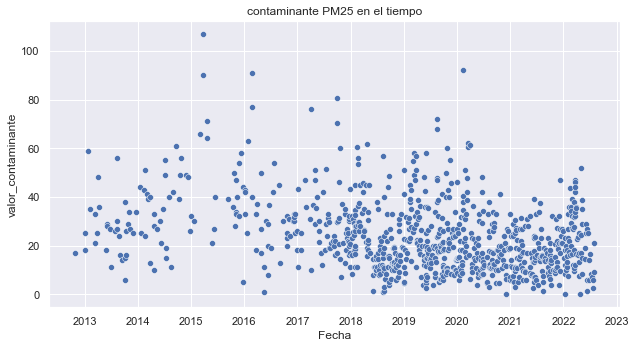

In [79]:
sns.scatterplot(
    data = muestraContaminantes[muestraContaminantes["contaminante"] == "pm25"],
    x = "Fecha",
    y = "valor_contaminante"
)

sns.set(rc={'figure.figsize':(10, 5)})

plt.title("contaminante PM25 en el tiempo")
plt.tight_layout(); plt.show()

Veamos, para los distintos contaminantes, una linea de tendencia que se ajuste a los datos, para un orden y un contaminante determinado con la siguiente función que permite graficar estos datos:

In [80]:
def scatterFit(contaminante, ordenAjuste=1, save=False):

    # dispersion y linea de tendencia para los datos con timestamp
    sns.regplot(
        data=muestraFechaTimestamp[muestraFechaTimestamp["contaminante"] == contaminante],
        x="Fecha",
        y="valor_contaminante",
        line_kws={"color": "orange"},
        order=ordenAjuste  # orden del ajuste
    )

    # configurar las fechas como datetime para el eje x
    ax = plt.gca()
    xticks = ax.get_xticks()
    xticks_dates = [datetime.fromtimestamp(x).strftime('%Y-%m') for x in xticks]
    ax.set_xticklabels(xticks_dates)

    sns.set(rc={'figure.figsize':(10, 5)})

    plt.title(f"contaminante {contaminante} en el tiempo")
    plt.tight_layout();

    if save == True:
        plt.savefig(f'trendline{contaminante}.png', bbox_inches='tight', dpi=200)
    
    plt.show()
    
    pass

Veamos los ajustes para cada uno de los contaminantes:

C:\Users\Administrador\AppData\Local\Temp\ipykernel_6604\3476521949.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticks_dates)


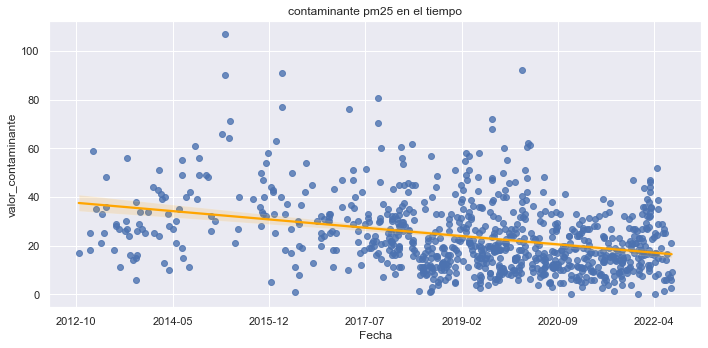

C:\Users\Administrador\AppData\Local\Temp\ipykernel_6604\3476521949.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticks_dates)


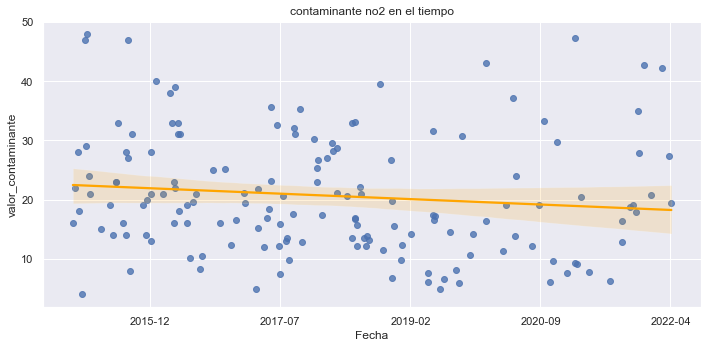

C:\Users\Administrador\AppData\Local\Temp\ipykernel_6604\3476521949.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticks_dates)


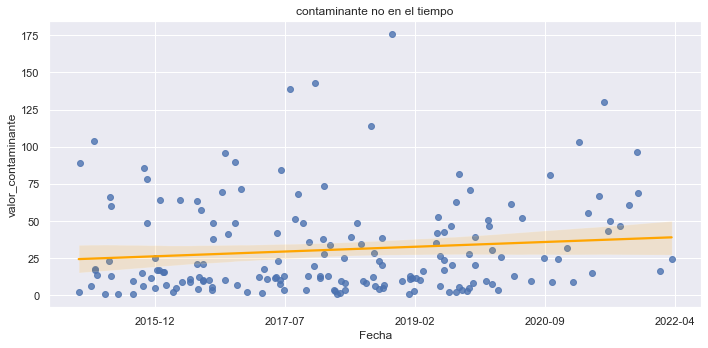

C:\Users\Administrador\AppData\Local\Temp\ipykernel_6604\3476521949.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticks_dates)


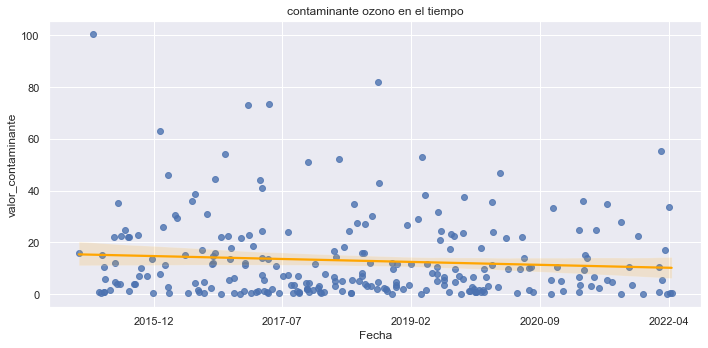

C:\Users\Administrador\AppData\Local\Temp\ipykernel_6604\3476521949.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticks_dates)


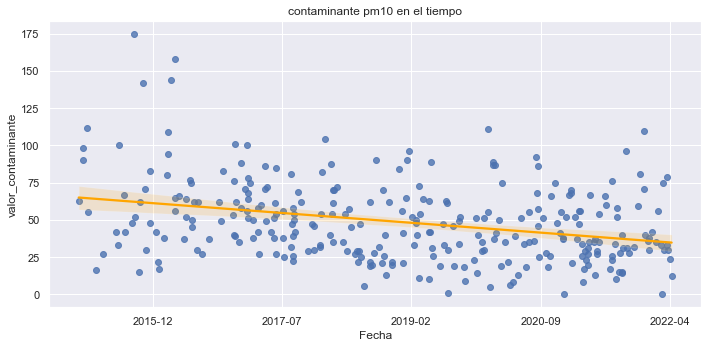

C:\Users\Administrador\AppData\Local\Temp\ipykernel_6604\3476521949.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticks_dates)


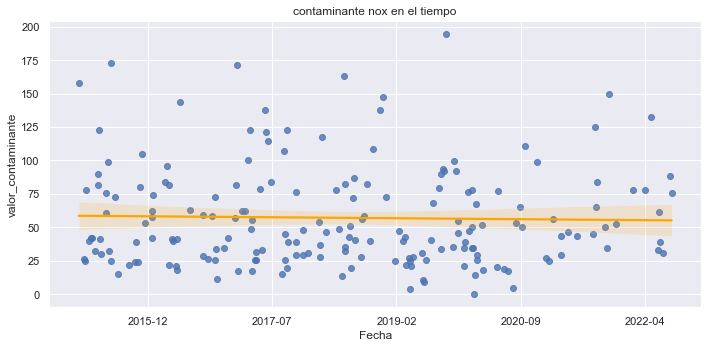

C:\Users\Administrador\AppData\Local\Temp\ipykernel_6604\3476521949.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticks_dates)


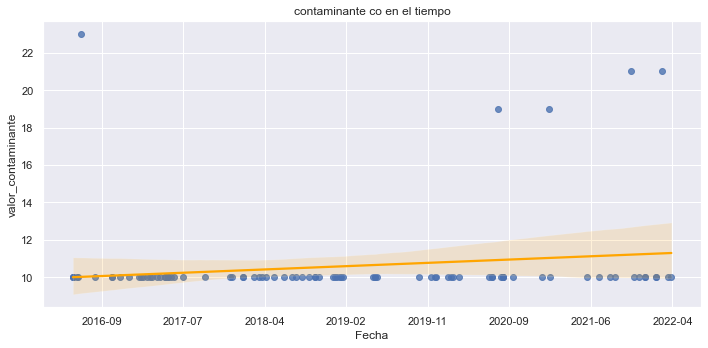

In [81]:
contaminantes = muestraContaminantes["contaminante"].unique()

for cont in contaminantes:
    scatterFit(cont, ordenAjuste=1, save=guardar_imagenes)

## **Comportamiento por periodos de tiempo**

Se tendrá la opción de analizar una media móvil a distintos valores para distintos periodos de tiempo

In [82]:
# obtener las semanas para cada año

def getWeek(df):
    return df.isocalendar()[1]

def getYear(df):
    return df.year

def getDay(df):
    return df.day

def getMonth(df):
    return df.month

muestraContaminantes.insert( 1, "año", muestraContaminantes["Fecha"].apply(getYear) )
muestraContaminantes.insert( 1, "mes", muestraContaminantes["Fecha"].apply(getMonth) )
muestraContaminantes.insert( 1, "semana", muestraContaminantes["Fecha"].apply(getWeek) )
muestraContaminantes.insert( 1, "dia", muestraContaminantes["Fecha"].apply(getDay) )
muestraContaminantes

,Fecha,dia,semana,mes,año,Dia_Semana,Hora,valor_contaminante,calidad_contaminante,calidad,estacion,contaminante
0,2012-10-27,27,43,10,2012,Saturday,3,17.0000,1,1,25,pm25
1,2013-01-03,3,1,1,2013,Thursday,4,25.0000,1,1,12,pm25
2,2013-01-05,5,1,1,2013,Saturday,13,18.0000,1,1,25,pm25
3,2013-01-21,21,4,1,2013,Monday,8,59.0000,1,1,25,pm25
4,2013-02-07,7,6,2,2013,Thursday,15,35.0000,1,1,12,pm25
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2022-07-25,25,30,7,2022,Monday,23,2.4117,1,1,85,pm25
1996,2022-07-27,27,30,7,2022,Wednesday,0,21.0000,1,1,48,pm25
1997,2022-07-28,28,30,7,2022,Thursday,0,9.2328,1,1,86,pm25
1998,2022-08-07,7,31,8,2022,Sunday,7,88.1100,1,1,6,nox


Unicamente para la muestra del PM25 tendremos:

In [83]:
muestraPM25 = muestraContaminantes[ muestraContaminantes["contaminante"] == "pm25" ]
muestraPM25

,Fecha,dia,semana,mes,año,Dia_Semana,Hora,valor_contaminante,calidad_contaminante,calidad,estacion,contaminante
0,2012-10-27,27,43,10,2012,Saturday,3,17.0000,1,1,25,pm25
1,2013-01-03,3,1,1,2013,Thursday,4,25.0000,1,1,12,pm25
2,2013-01-05,5,1,1,2013,Saturday,13,18.0000,1,1,25,pm25
3,2013-01-21,21,4,1,2013,Monday,8,59.0000,1,1,25,pm25
4,2013-02-07,7,6,2,2013,Thursday,15,35.0000,1,1,12,pm25
...,...,...,...,...,...,...,...,...,...,...,...,...
1993,2022-07-18,18,29,7,2022,Monday,13,7.2741,1,1,86,pm25
1994,2022-07-25,25,30,7,2022,Monday,3,6.0000,1,1,48,pm25
1995,2022-07-25,25,30,7,2022,Monday,23,2.4117,1,1,85,pm25
1996,2022-07-27,27,30,7,2022,Wednesday,0,21.0000,1,1,48,pm25


## **Promedio del contaminante por semana**

En este caso, haremos los cálculos de los promedios por estación, para cada semana de cada año. Luego se podrá hacer para cada mes también.

In [84]:
estaciones = muestraContaminantes["estacion"].unique()
contaminantes = muestraContaminantes["contaminante"].unique()
semanas = muestraContaminantes["semana"].unique()
meses = muestraContaminantes["mes"].unique()
years = muestraContaminantes["año"].unique()

In [85]:
promedio_semana = [];  newYears = [];  newSemanas = [];  newEstaciones = [];  newContaminantes = []

for year in years:
    for semana in semanas:
        for estacion in estaciones:
            for contaminante in contaminantes:
                promedio_semana.append(
                    np.mean(
                        muestraContaminantes[
                            (muestraContaminantes["año"] == year) & \
                            (muestraContaminantes["semana"] == semana) & \
                            (muestraContaminantes["estacion"] == estacion) & \
                            (muestraContaminantes["contaminante"] == contaminante)
                        ]["valor_contaminante"]
                    )
                )
            newContaminantes += list(contaminantes)
            newEstaciones += len(contaminantes)*[estacion]
            newSemanas += len(contaminantes)*[semana]
            newYears += len(contaminantes)*[year]

In [86]:
# funcion para concatenar dos listas, elemento a elemento
def addLists(firstList, secondList):
    finalList= []
    for i in range( len(firstList) ):
        finalList.append( str(firstList[i]) + '-' + str(secondList[i]) )
    return finalList

In [110]:
prom_muestra_contaminantes = {
    "fecha":addLists(newYears, newSemanas),
    "año":newYears,
    "semana":newSemanas,
    "estacion":newEstaciones,
    "contaminante":newContaminantes,
    "promedio_contaminante":promedio_semana
}

prom_muestra_contaminantes_df = pd.DataFrame(data=prom_muestra_contaminantes)

prom_muestra_contaminantes_df = prom_muestra_contaminantes_df.dropna()

prom_muestra_contaminantes_df

,fecha,año,semana,estacion,contaminante,promedio_contaminante
0,2012-43,2012,43,25,pm25,17.0000
5201,2013-43,2013,43,12,pm25,29.0000
5292,2013-1,2013,1,25,pm25,18.0000
5299,2013-1,2013,1,12,pm25,25.0000
5390,2013-4,2013,4,25,pm25,59.0000
...,...,...,...,...,...,...
56376,2022-27,2022,27,6,nox,30.8755
56434,2022-27,2022,27,83,pm25,8.3100
56462,2022-30,2022,30,48,pm25,13.5000
56518,2022-30,2022,30,86,pm25,9.2328


Ordenamos por año y semana:

In [111]:
prom_muestra_contaminantes_df = prom_muestra_contaminantes_df.sort_values(by=["año", "semana"]).reset_index().drop("index", axis=1)
prom_muestra_contaminantes_df

,fecha,año,semana,estacion,contaminante,promedio_contaminante
0,2012-43,2012,43,25,pm25,17.0000
1,2013-1,2013,1,25,pm25,18.0000
2,2013-1,2013,1,12,pm25,25.0000
3,2013-4,2013,4,25,pm25,59.0000
4,2013-6,2013,6,12,pm25,35.0000
...,...,...,...,...,...,...
1736,2022-30,2022,30,48,pm25,13.5000
1737,2022-30,2022,30,86,pm25,9.2328
1738,2022-30,2022,30,85,pm25,2.4117
1739,2022-31,2022,31,6,nox,88.1100


**Únicamente para el contaminante PM2.5:**

In [112]:
dfprueba = prom_muestra_contaminantes_df[ prom_muestra_contaminantes_df["contaminante"] == "pm25" ]
dfprueba

,fecha,año,semana,estacion,contaminante,promedio_contaminante
0,2012-43,2012,43,25,pm25,17.0000
1,2013-1,2013,1,25,pm25,18.0000
2,2013-1,2013,1,12,pm25,25.0000
3,2013-4,2013,4,25,pm25,59.0000
4,2013-6,2013,6,12,pm25,35.0000
...,...,...,...,...,...,...
1734,2022-27,2022,27,83,pm25,8.3100
1735,2022-29,2022,29,86,pm25,7.2741
1736,2022-30,2022,30,48,pm25,13.5000
1737,2022-30,2022,30,86,pm25,9.2328


## **Prueba de media móvil**

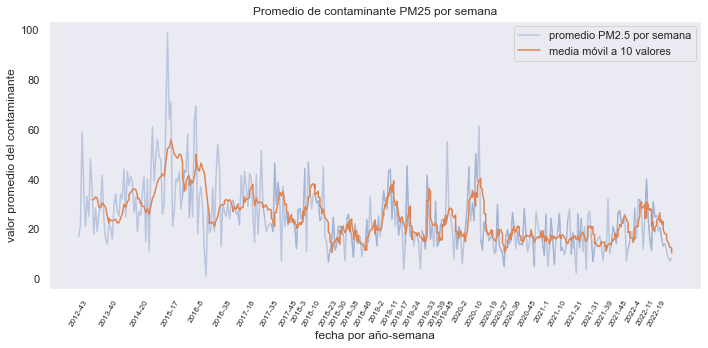

In [113]:
valores = 10

media_movil = dfprueba["promedio_contaminante"].rolling(valores).mean()

sns.set_theme(style="dark")

sns.lineplot(
    data = dfprueba,
    x = "fecha",
    y = "promedio_contaminante",
    ci = False,
    alpha = 0.3,
    label = "promedio PM2.5 por semana"
)

plt.plot(
    np.array(dfprueba["fecha"]),
    media_movil,
    label = f"media móvil a {valores} valores",
)

elements = [ np.array(dfprueba["fecha"])[i] for i in range(0, len(dfprueba["fecha"]), 20) ]

plt.xticks(elements, fontsize=8, rotation=60)
plt.title("Promedio de contaminante PM25 por semana")
plt.xlabel("fecha por año-semana"); plt.ylabel("valor promedio del contaminante")

plt.legend(); plt.tight_layout();

# save figure
if guardar_imagenes:
    plt.savefig(f"movil_pm25_semana_{valores}_valores.png", bbox_inches="tight", dpi=200)

plt.show()

## **media movil por contaminante-estación**

Los siguientes cálculos han sido hechos a partir de tomar las consideraciones anteriores de los promedios de cada contaminante para cada estación, haciendo el cálculo para cada semana, para cada semana de cada año. Ahora, analicemos los resultados para la media móvil en dos tipos: para ver por diferentes estaciones para un solo contaminante y para ver por diferentes contaminantes para una sola estación dada. Los resultados son los siguientes:

In [158]:
# funciones implementadas

def contaminantePorEstacion(contaminante, valores=5, num_estaciones=3):

    sns.set_theme(style="dark")

    estaciones = prom_muestra_contaminantes_df["estacion"].unique()

    for estacion in estaciones[:num_estaciones]:

        fechas = np.array(
            prom_muestra_contaminantes_df[
                (prom_muestra_contaminantes_df["contaminante"] == contaminante) & \
                (prom_muestra_contaminantes_df["estacion"] == estacion)
            ]["fecha"]
        )

        media_movil = prom_muestra_contaminantes_df[
                            (prom_muestra_contaminantes_df["contaminante"] == contaminante) & \
                            (prom_muestra_contaminantes_df["estacion"] == estacion)
                        ]["promedio_contaminante"].rolling(valores).mean()

        plt.plot(
            fechas,
            media_movil,
            label = f"media móvil para la estacion {estacion}",
            alpha=0.8
        )

        elements = [
            np.array(fechas)[i] for i in range(0, len(fechas), 3)
        ]

        plt.xticks(elements, fontsize=8, rotation=60)
        plt.title(f"Media movil a {valores} valores para el promedio de contaminante {contaminante} por semana y estaciones")
        plt.xlabel("fecha por año-semana"); plt.ylabel("valor promedio del contaminante")

        plt.legend(loc='upper right'); plt.tight_layout(); plt.grid()

        plt.show()

    # save figure
    if guardar_imagenes:
        plt.savefig(f"movil_pm25_semana_{valores}_valores.png", bbox_inches="tight", dpi=200)

    pass

def estacionPorContaminante(estacion, valores=5, num_contaminantes=3):

    sns.set_theme(style="dark")

    contaminantes = prom_muestra_contaminantes_df["contaminante"].unique()

    for contaminante in contaminantes[:num_contaminantes]:

        fechas = np.array(
            prom_muestra_contaminantes_df[
                (prom_muestra_contaminantes_df["contaminante"] == contaminante) & \
                (prom_muestra_contaminantes_df["estacion"] == estacion)
            ]["fecha"]
        )

        media_movil = prom_muestra_contaminantes_df[
                            (prom_muestra_contaminantes_df["contaminante"] == contaminante) & \
                            (prom_muestra_contaminantes_df["estacion"] == estacion)
                        ]["promedio_contaminante"].rolling(valores).mean()

        plt.plot(
            fechas,
            media_movil,
            label = f"media móvil para el contaminante {contaminante}",
            alpha=0.8
        )

        elements = [
            np.array(fechas)[i] for i in range(0, len(fechas), 3)
        ]

        plt.xticks(elements, fontsize=8, rotation=60)
        plt.title(f"Media movil a {valores} valores para los contaminantes por semana, estacion {estacion}")
        plt.xlabel("fecha por año-semana"); plt.ylabel("valor promedio del contaminante")

        plt.legend(loc='upper right'); plt.tight_layout(); plt.grid()

        plt.show()

    # save figure
    if guardar_imagenes:
        plt.savefig(f"movil_pm25_semana_{valores}_valores.png", bbox_inches="tight", dpi=200)

    pass

In [157]:
prom_muestra_contaminantes_df["contaminante"].unique()

array(['pm25', 'no2', 'no', 'ozono', 'pm10', 'nox', 'co'], dtype=object)

In [ ]:
contaminantePorEstacion("nox", num_estaciones=14)

In [152]:
prom_muestra_contaminantes_df["estacion"].unique()

array([25, 12, 48,  6, 46, 41, 43, 44, 80, 79, 86, 84, 83, 85],
      dtype=int64)

In [ ]:
estacionPorContaminante(6, valores=5, num_contaminantes=7)

Adición de la **media movil** para una cantidad $n$ de intervalo para un contaminante dado, comparando con sus valores promediados por semana:

In [170]:
def calcular_media_movil(contaminante, valores = 5):

    fechas = np.array(
        prom_muestra_contaminantes_df[
            prom_muestra_contaminantes_df["contaminante"] == contaminante
        ]["fecha"]
    )

    datos = prom_muestra_contaminantes_df[
        prom_muestra_contaminantes_df["contaminante"] == contaminante
    ]["promedio_contaminante"]

    media_movil = datos.rolling(valores).mean()

    sns.set_theme(style="dark")

    sns.lineplot(
        data = prom_muestra_contaminantes_df[ prom_muestra_contaminantes_df["contaminante"] == contaminante ],
        x = "fecha",
        y = "promedio_contaminante",
        ci = False,
        alpha = 0.3,
        label = f"promedio {contaminante} por semana"
    )

    plt.plot(
        fechas,
        media_movil,
        label = f"media móvil a {valores} valores",
    )

    elements = [ np.array(prom_muestra_contaminantes_df["fecha"])[i] for i in range(0, len(prom_muestra_contaminantes_df["fecha"]), 50) ]

    plt.xticks(elements, fontsize=8, rotation=60)
    plt.title(f"Tendencia de contaminante {contaminante} por semana")
    plt.xlabel("fecha por año-semana"); plt.ylabel("valor promedio del contaminante")

    plt.legend(); plt.tight_layout();

    # save figure
    if guardar_imagenes:
        plt.savefig(f"movil_pm25_semana_{valores}_valores.png", bbox_inches="tight", dpi=200)

    plt.show()

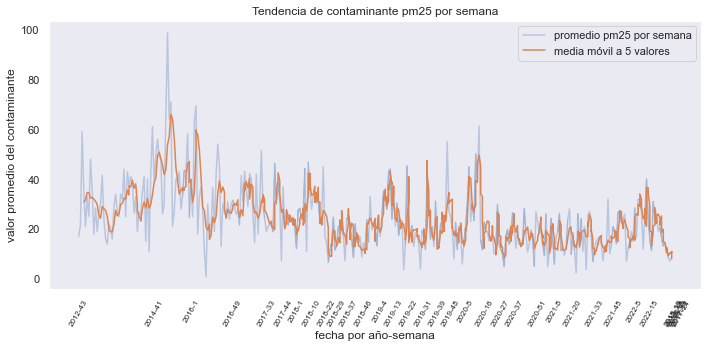

In [175]:
calcular_media_movil("pm25", valores = 5)

## **Promedio del contaminante por mes**

In [33]:
promedio_mes = [];  newYears = [];  newMes = []

for year in years:
    for mes in meses:
        promedio_mes.append(
            np.mean(
                muestraPM25[
                    (muestraPM25["año"] == year) & \
                    (muestraPM25["mes"] == mes)
                ]["valor_contaminante"]
            )
        )
    newMes += list(meses)
    newYears += len(meses)*[year]

In [34]:
prom_muestra_mes_pm25 = {
    "fecha":addLists(newYears, newMes),
    "año":newYears,
    "mes":newMes,
    "promedio_contaminante":promedio_mes
}

prom_muestra_mes_pm25_df = pd.DataFrame(data=prom_muestra_mes_pm25)

prom_muestra_mes_pm25_df = prom_muestra_mes_pm25_df.dropna()

prom_muestra_mes_pm25_df = prom_muestra_mes_pm25_df.sort_values(by=["año", "mes"]).reset_index().drop("index", axis=1)
prom_muestra_mes_pm25_df

,fecha,año,mes,promedio_contaminante
0,2012-12,2012,12,31.500000
1,2013-1,2013,1,29.000000
2,2013-2,2013,2,41.666667
3,2013-4,2013,4,24.666667
4,2013-5,2013,5,25.600000
...,...,...,...,...
106,2022-3,2022,3,25.470790
107,2022-4,2022,4,15.582585
108,2022-5,2022,5,16.927733
109,2022-6,2022,6,17.432000


calculemos la media móvil:

In [35]:
def calcular_media_movil_mes(valores = 5):

    media_movil = prom_muestra_mes_pm25_df["promedio_contaminante"].rolling(valores).mean()

    sns.set_theme(style="dark")

    sns.lineplot(
        data = prom_muestra_mes_pm25_df,
        x = "fecha",
        y = "promedio_contaminante",
        ci = False,
        alpha = 0.3,
        label = "promedio PM2.5 por mes"
    )

    plt.plot(
        np.array(prom_muestra_mes_pm25_df["fecha"]),
        media_movil,
        label = f"media móvil a {valores} valores",
    )

    elements = [ np.array(prom_muestra_mes_pm25_df["fecha"])[i] for i in range(0, len(prom_muestra_mes_pm25_df["fecha"]), 10) ]

    plt.xticks(elements, fontsize=10, rotation=45)
    plt.title("Promedio de contaminante PM25 por mes")
    plt.xlabel("fecha por año-mes"); plt.ylabel("valor promedio del contaminante")

    plt.legend(); plt.grid(); plt.tight_layout();

    # save figure
    if guardar_imagenes:
        plt.savefig(f"movil_pm25_mes_{valores}_valores.png", bbox_inches="tight", dpi=150)

    plt.show()

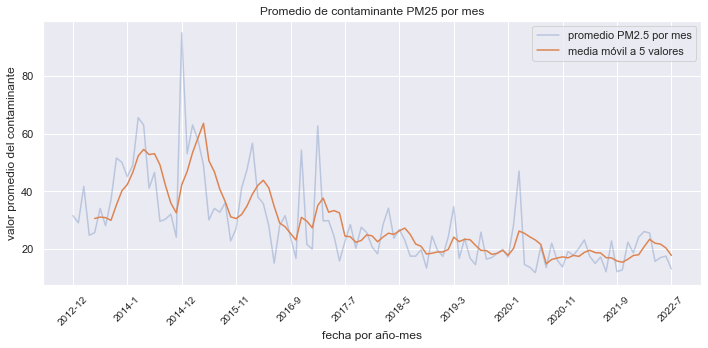

In [36]:
calcular_media_movil_mes(valores = 5)

In [37]:
muestraContaminantes["valor_contaminante"].describe()

count    1600.000000
mean       29.081048
std        25.278280
min         0.000000
25%        11.657200
50%        22.000000
75%        38.140700
max       157.829000
Name: valor_contaminante, dtype: float64